# TMR4222 Thermal System Exercise 1

## Assignment 1.1

The heat flux through a wood slab 60 mm thick, whose inner and outer surface temperatures are
35 and 15°C, respectively, has been determined to be 35 W/m2.  What is the thermal conductivity
of the wood?

1. Create a function (get_heat_flux_by_conduction) in "thermal_system_calculation.py" to
calculate  the heat flux by conduction for given temperature at which heat flows from,
temperature  at which heat flows to and thickness.

As the heat flux by conduction can be calculated by the following equation
$$q'' = k \frac{\Delta T}{t} $$,
we can easily set the function as in 'thermal_system_calculation.py'. 

2. Find the thermal conductivity given the function from 1. and conditions using scipy.optimize
.root.

In [1]:
from functools import partial
from scipy.integrate import solve_ivp
from scipy.optimize import root
import numpy as np
import matplotlib.pyplot as plt
import datetime
from thermal_system_calculation import get_heat_flux_by_conduction

# We are given the following conditions.
heat_flux_given = 35 # Heat flux through the wood slab [W/m2]
thickness = 0.06 # Thickness of the wood slab [m]
temp_inner = 35 # Temperature at inner surface [degC]
temp_outer = 15 # Temperature at outer surface [degC]

# Here we set the equation to solve as f(x) = 0
def equation_to_solve(thermal_conductivity):
    heat_flux =  get_heat_flux_by_conduction(
        temperature_from=temp_inner,
        temperature_to=temp_outer,
        thickness=thickness,
        thermal_conductivity=thermal_conductivity
    )
    return heat_flux - heat_flux_given

# Now we use the scipy.optimize.root funcion to find the thermal conductivity
result = root(equation_to_solve, 0)
thermal_conductivity = result.x[0]
print(f'The thermal conductivity is {thermal_conductivity:.3f} W/mK')

The thermal conductivity is 0.105 W/mK


## Assignment 1.2
You’ve experienced convection cooling if you’ve ever extended your hand out the window of a
moving vehicle or into a flowing water stream. With the surface of your hand at a temperature of
 30°C, there are two cases we need to calculate the heat flux from hand to the environment. 
- a vehicle at speed of 40 km/h in air at -8°C with a convection coefficient of 40 W/(m2·K).
- a vehicle at speed of 0,2 m/s in a water stream at 10°C with a convection coefficient of 900 W/(m2·K).

1. Create a function (get_heat_flux_by_convection) in "thermal_system_calculation.py" that calculates the heat flux given the temperature of the surface, temperature of the fluid at contact, and the convection coefficient.

Heat flux by convection can be calculated by the following equation.
$$ q'' = \alpha \times \Delta T $$
where $\alpha$ is a convection coefficient.
We can create a function for it.

2. Calculate the heat flux for each case using the function created. 

In [2]:
from thermal_system_calculation import get_heat_flux_by_convection

temp_hand = 30 # Temperature of the hand [degC]

# For the first case
temp_air = -8 # Temperature of the air [degC]
alpha = 40 # Heat convection coefficient [W/(m2 k)]
heat_flux = get_heat_flux_by_convection(alpha, temp_hand, temp_air)
print(f'The hand loses {heat_flux:.3f} W/m2 to air.')

# For the second case
temp_air = -10 # Temperature of the air [degC]
alpha = 900 # Heat convection coefficient [W/(m2 k)]
heat_flux = get_heat_flux_by_convection(alpha, temp_hand, temp_air)
print(f'The hand loses {heat_flux:.3f} W/m2 to water.')

The hand loses 1520.000 W/m2 to air.
The hand loses 36000.000 W/m2 to water.


## Assignment 1.3
Explain precisely
- The physical mechanisms associated with heat transfer by conduction and convection.
- What is the difference between heat transfer rate and heat flux
- What is the thermal conductivity? Units and role in heat transfer
- What is the driving potential for heat transfer?
- The connection between thermodynamics and heat transfer
- Fouriers law and Newton’s law of cooling

## Assignment 2
A plane 1D wall with a thickness of $L=0.01$[m] consisting of a material with a thermal
conductivity of $k=225$ [W/mK]. The temperature on the left and right end of the wall is and
respectively. Determine the unknown variables in each of the problems 1-5 below.

| Problem |$T_1 [^o\rm{C}]$|$T_2 [^o\rm{C}]$|$\frac{dT}{dx} [^o\rm{C}/\rm{m}]$|$q''[\rm{W}/\rm{m}^2]$|
|---|---|---|---|---|
|1|100|0|||
|2|100||-250||
|3|80||+200||
|4||-5||4000|
|5|30|||-3000|

In [3]:
thickness = 0.01 # [m]
thermal_conductivity = 225 # [W/mK]
# 1
temp1 = 100
temp2 = 0
dt_dx = (temp1 - temp2) / thickness
heat_flux = thermal_conductivity * dt_dx
print (f'1: dt_dx = {dt_dx:.3f}, q" = {heat_flux:.3f}')

# 2
dt_dx = -250
temp1 = 100
temp2 = (dt_dx * thickness - temp1) * -1
heat_flux = thermal_conductivity * dt_dx
print (f'1: temp2 = {temp2:.3f}, q" = {heat_flux:.3f}')

# 3
temp1 = 80
dt_dx = 200
temp2 = (dt_dx * thickness - temp1) * -1
heat_flux = thermal_conductivity * dt_dx
print (f'1: temp2 = {temp2:.3f}, q" = {heat_flux:.3f}')

# 4
temp2 = -5
heat_flux = 4000
dt_dx = heat_flux / thermal_conductivity
temp1 = dt_dx * thickness + temp2
print (f'1: temp1 = {temp1:.3f}, dT_dx = {dt_dx:.3f}')

# 5
temp1 = 30
heat_flux = -3000
dt_dx = heat_flux / thermal_conductivity
temp2 = (dt_dx * thickness - temp1) * -1
print (f'1: temp1 = {temp2:.3f}, dT_dx = {dt_dx:.3f}')

1: dt_dx = 10000.000, q" = 2250000.000
1: temp2 = 102.500, q" = -56250.000
1: temp2 = 78.000, q" = 45000.000
1: temp1 = -4.822, dT_dx = 17.778
1: temp1 = 30.133, dT_dx = -13.333


## Assignment 3
We are going to check out different strategies for cargo heating (crude oil) and how this affects the operational costs. The only requirement is that the cargo should not during any time of the route be below a critical temperature $T_\rm{crit}$ and that at start of unloading the cargo, be above a required temperature 
$T_\rm{pump}$.

The temperature of the crude oil at loading is given. It is assumed that the steel in the cargo tanks will have the same temperature as the oil before the ship is departing. When the ship is departing the oil (and steel) will lose heat to the cold sea, and this heat loss is assumed linearly dependent of falling temperature of cargo and steel. When the cargo has reached a given temperature we start to heat the cargo using two steam boilers installed onboard. The cargo is heated until a required temperature, which is the unloading temperature, has been reached. Data for the vessel is

In [4]:
mass_total_cargo = 40000000 # Total cargo mass, kg
mass_steel = 2000000 # Total heated steel mass, kg
temp_initial = 60 # Loading temperature, degC
temp_unloading = 60 # Unloading temperature, degC
heating_power = 8000000 # Heating power delivered from one boiler , W
heat_loss_to_sea_30 = 3000000 # Heat loss to sea at 30degC, W
heat_loss_to_sea_60 = 7000000 # Heat loss to sea at 60degC, W

Specific heat capacity of oil and steel is

In [5]:
cp_oil = 1800 # Specific heat capacity of crude oil, J/kgK
cp_steel = 450 # Specific heat capacity of steel, J/kgK

1. Find a function $\dot{T}(t)$, which gives the rate of temperature change at time t in seconds,
  which accounts for the heat loss and heating from boiler into account. Create a function for it.

First, energy balance for the cargo hold will be accounted.
$$\dot{U}_\mathrm{oil} = \dot{Q}_\mathrm{heating} -\dot{Q}_\mathrm{loss}$$
Here, $U=m_\mathrm{oil} \cdot c_{p, \mathrm{oil}} \left(T_\mathrm{oil} - T_{ref}\right) + U_\mathrm{ref}$ and, therefore, $\dot{U} = m_\mathrm{oil} \cdot c_{p, \mathrm{oil}} \cdot \dot{T}_\mathrm{oil}$ with assumption that mass and the heat capacity is constant. If we sort the equation for $\dot{T}_\mathrm{oil}$,

$$\dot{T}_\mathrm{oil} = \frac{1}{m_\mathrm{oil} c_{p, \mathrm{oil}}} \left(\dot{Q}_\mathrm{heating} - \dot{Q}_\mathrm{loss} \right) $$

We assumed that the heat loss to the sea is linearly proportional to the temperature of the cargo. As we are given with the heat loss for at two temperature points, we can find the function,
$$\dot{Q}_{loss}\left(T_\rm{oil}\right) = aT_\rm{oil} + b$$

In [6]:
a = (heat_loss_to_sea_60 - heat_loss_to_sea_30) / (60 - 30)
b = heat_loss_to_sea_60 - a * 60
print(f'a = {a:.3f}, b = {b:.3f}')

a = 133333.333, b = -1000000.000


Then, we can create a function for the $\dot{T}_\mathrm{oil}$

In [7]:
def get_heat_loss(temperature):
    return a * temperature + b

def get_temperature_derivative(time, temperature, heating_power):
    return 1 / (mass_total_cargo * cp_oil) * (heating_power - get_heat_loss(temperature))

2. Solve the differential equation in 3-1 numerically and analytically. Compare the two solutions.

We can set a function that solves it numerically with ODE solver

In [8]:
def get_temperature_crude_oil_numerical_solution(time, heating_power, initial_temperature):
    """Returns solution with the fields of t(time), y(solution at t), etc"""
    derivative_function = partial(get_temperature_derivative, heating_power=heating_power)
    return solve_ivp(derivative_function, t_span=(0, time), y0=[initial_temperature])

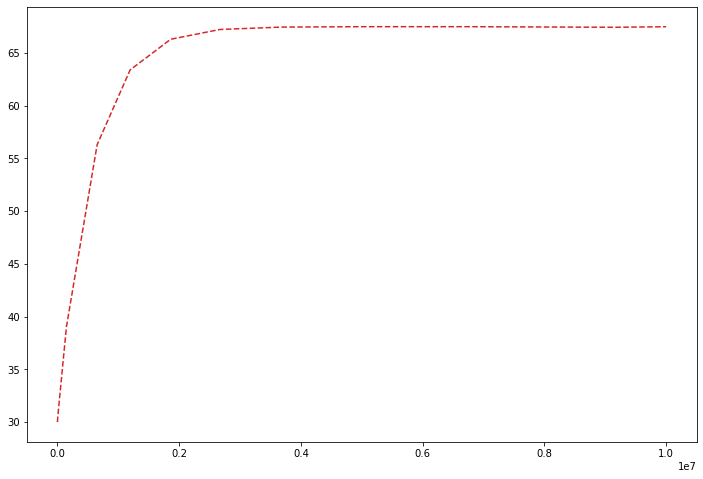

In [9]:
import matplotlib.pyplot as plt

initial_temperature = 30
time_end = 10000000

# Now we can use the numerical solution
solution = get_temperature_crude_oil_numerical_solution(
    time=time_end,
    heating_power=heating_power,
    initial_temperature=initial_temperature
)

# Let's plot the result
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(solution.t, solution.y[0,:], linestyle='--', color="tab:red", label='Numerical solution')

For analytical solution, we can set the equation for $\dot{T}$ in function of $T$.

$$\dot{T}_{oil} = a_1 T + a_0$$
$$\dot{T}_{oil} = a_1 \left(T + \frac{a_0}{a_1}\right)$$
The coeffient of the right hand side of the equation is

Then, the differenctial equation is
$$ \dot{T}_{oil} = \frac{1}{m_{oil} c_{p,oil}}\left(\dot{Q}_\mathrm{heating} - aT - b\right)$$

In [10]:
a1 = -1 / (mass_total_cargo * cp_oil) * a
# For a0, we will define a function as it depends on the heating power from the boiler
def get_a0(heating_power):
    return 1 / (mass_total_cargo * cp_oil) * (heating_power - b)
print(f'a1 = {a1:.8f}')

a1 = -0.00000185


Sorting the equation to solve the differential equation,

$$\int_{T_0}^{T} \frac{1}{T + \frac{a_0}{a_1}} dT = \int_{0}^{t} a_1 dt$$
$$ ln(T + \frac{a_0}{a_1}) = a_1 t + ln(T_0 + \frac{a_0}{a_1}) $$
$$ T = e^{a_1 t + ln(T_0 + \frac{a_0}{a_1})} - \frac{a_0}{a_1}$$
$$ T = \left(T_0 + \frac{a_0}{a_1}\right)e^{a_1 t} - \frac{a_0}{a_1}$$

Now we can create a function to calculate $T$ directly.

In [11]:
def get_temperature_crude_oil(time, a1, heating_power, initial_temperature):
    a0 = get_a0(heating_power)
    print(f'a0: {a0:.3f}, a0/a1: {a0/a1:.3f}')
    return (initial_temperature + a0/a1) * np.exp(a1 * time) - a0 / a1

Let's calculate the temperature for time horizon and compare it with the numerical solution.

a0: 0.000, a0/a1: -67.500


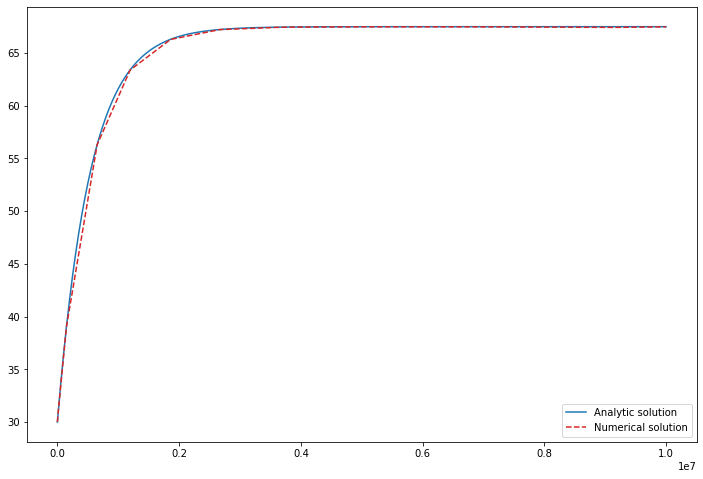

In [12]:
time_interval = 10000
time_vector = np.arange(0, time_end + time_interval, time_interval)

# First calculate the temperature from the analytical solution
temperature_analytical = get_temperature_crude_oil(
    time=time_vector,
    a1=a1,
    heating_power=heating_power,
    initial_temperature=initial_temperature
)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(time_vector, temperature_analytical, color="tab:blue", label="Analytic solution")
ax.plot(solution.t, solution.y[0,:], linestyle='--', color="tab:red", label='Numerical solution')
ax.legend()

3. How long does it take until the crude oil temperature has dropped to 30<sup>o</sup>C when the temperature of crude oil was 60<sup>o</sup>C initially and there is no heating? 

Text(0, 0.5, 'Temperature (degC)')

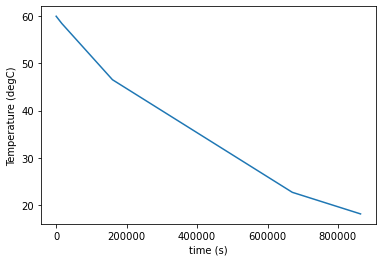

In [13]:
initial_temperature = 60
final_temperature = 30

# Let's plot the graph first and make a rough guess
solution = get_temperature_crude_oil_numerical_solution(
    time=10 * 24 * 3600, # 10 days 
    heating_power=0,
    initial_temperature=initial_temperature
)
fig, ax = plt.subplots()
ax.plot(solution.t, solution.y[0, :])
ax.set_xlabel('time (s)')
ax.set_ylabel('Temperature (degC)')

In [14]:
# Let's set up the equation to solve 
def equation_to_solve(time_end, heating_power, initial_temperature, final_temperature):
    solution = get_temperature_crude_oil_numerical_solution(
        time=time_end,
        heating_power=heating_power,
        initial_temperature=initial_temperature
    )
    return solution.y[0, -1] - final_temperature

initial_time_end = 500000
equation_to_solve_for_this_problem = partial(
    equation_to_solve, 
    heating_power = 0,
    initial_temperature=initial_temperature,
    final_temperature=final_temperature
)
solution = root(equation_to_solve_for_this_problem, initial_time_end)
          
if solution.status == 1:  # Solution converged
    time_delta = datetime.timedelta(seconds=solution.x[0])
    days = time_delta.days
    hours = int(time_delta.seconds // 3600)
    seconds_left = time_delta.seconds - hours * 3600
    minutes = int(seconds_left // 60)
    seconds = seconds_left - minutes * 60

    print(f"It takes {time_delta.days} days, {hours} hours, {minutes} minutes, {seconds:.2f} seconds ")


It takes 5 days, 7 hours, 5 minutes, 50.00 seconds 


3. When the cargo temperature has reached 30 <sup>o</sup>C both the boilers are started, but after 30 hours operation one of the boilers are turned off due to some technical problems. (This is alternative I) 

    Will we be able to reach the required unload temperature 60 oC before in harbor? Draw a sketch showing the expected scenario, i.e. temperature development from loading to unloading. (optional:  make a numerical simulation using Matlab (or other) and plot the temperature)

Let's calculate how long it takes to reach 60<sup>o</sup>C from 30<sup>o</sup> with one boiler.

In [15]:
# First calculate the temperature after running two boilers for 30 hours
solution = get_temperature_crude_oil_numerical_solution(
    time=30 * 3600,
    initial_temperature=30,
    heating_power=8000000 * 2
)
temperature_after_30hours_heating = solution.y[0, -1]
print(f"Temperatuer reaches {temperature_after_30hours_heating} after 30 hours")


# Now we well calculate how long it takes to reach the final temperature 60oC
equation_to_solve_for_this_problem = partial(
    equation_to_solve,
    heating_power=8000000,
    initial_temperature=temperature_after_30hours_heating,
    final_temperature=60
)
initial_guess = 7 * 24 * 3600 # Initial guess is 7 days
solution = root(equation_to_solve_for_this_problem, 7 * 24 * 3600)

if solution.status == 1:  # Solution converged
    time_delta = datetime.timedelta(seconds=solution.x[0])
    days = time_delta.days
    hours = int(time_delta.seconds // 3600)
    seconds_left = time_delta.seconds - hours * 3600
    minutes = int(seconds_left // 60)
    seconds = seconds_left - minutes * 60

    print(f"It takes {time_delta.days} days, {hours} hours, {minutes} minutes, {seconds:.2f} seconds with one boiler to reach 60oC")


Temperatuer reaches 47.67375065304495 after 30 hours
It takes 6 days, 1 hours, 49 minutes, 20.00 seconds with one boiler to reach 60oC


It took 5 days and 7 hours to reach 30<sup>o</sup>C, 30 hours to reach 47.7<sup>o</sup>C and 6 days and 1 hours to reach 60<sup>o</sup>C. The sum exceeds the voyage time.

3. What is the power required to keep the temperature at 40<sup>o</sup>C.

If the temperature is constant, it means the change in energy content of the crude oil is zero. Therefore,
$$\dot{Q}_\mathrm{heating} = \dot{Q}_\mathrm{loss}$$

In [16]:
heating_power = get_heat_loss(temperature=40)
print(f"{heating_power / 1000:.1f}kW is required.")

4333.3kW is required.
